In [1]:
!pip install fastai --upgrade
!pip install timm wwf

     |████████████████████████████████| 194kB 18.1MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 245kB 19.3MB/s 


In [2]:
# !wget https://www.dropbox.com/s/cb3g53z4pbtaqvl/erm.zip?dl=1 -O erm.zip
!wget https://unirioja-my.sharepoint.com/:u:/g/personal/magarcd_unirioja_es/ERU6UfU2RGREnYNl_KxSpkkB4NP42bHj6siEIWrQ7aWPAQ?download=1 -O erm.zip

--2021-03-03 15:25:28--  https://unirioja-my.sharepoint.com/:u:/g/personal/magarcd_unirioja_es/ERU6UfU2RGREnYNl_KxSpkkB4NP42bHj6siEIWrQ7aWPAQ?download=1
Resolving unirioja-my.sharepoint.com (unirioja-my.sharepoint.com)... 13.107.136.9
Connecting to unirioja-my.sharepoint.com (unirioja-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/magarcd_unirioja_es/Documents/erm.zip?originalPath=aHR0cHM6Ly91bmlyaW9qYS1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9tYWdhcmNkX3VuaXJpb2phX2VzL0VSVTZVZlUyUkdSRW5ZTmxfS3hTcGtrQjROUDQyYkhqNnNpRUlXclE3YVdQQVE_cnRpbWU9UEZMNmsxamUyRWc [following]
--2021-03-03 15:25:29--  https://unirioja-my.sharepoint.com/personal/magarcd_unirioja_es/Documents/erm.zip?originalPath=aHR0cHM6Ly91bmlyaW9qYS1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9tYWdhcmNkX3VuaXJpb2phX2VzL0VSVTZVZlUyUkdSRW5ZTmxfS3hTcGtrQjROUDQyYkhqNnNpRUlXclE3YVdQQVE_cnRpbWU9UEZMNmsxamUyRWc
Reusing existing connection to unirioja-my.sharepo

In [3]:
!unzip erm.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: erm/train/no/anonymized_1873542_fakeB.jpg  
  inflating: erm/train/no/anonymized_887511_fakeB.jpg  
  inflating: erm/train/no/anonymized_1351887_fakeB.jpg  
  inflating: erm/train/no/anonymized_1099051_fakeB.jpg  
  inflating: erm/train/no/anonymized_448602_fakeB.jpg  
  inflating: erm/train/no/anonymized_852019_fakeB.jpg  
  inflating: erm/train/no/anonymized_169973_fakeB.jpg  
  inflating: erm/train/no/anonymized_1241994_fakeB.jpg  
  inflating: erm/train/no/anonymized_1898489_fakeB.jpg  
  inflating: erm/train/no/anonymized_160483_fakeB.jpg  
  inflating: erm/train/no/anonymized_593874_fakeB.jpg  
  inflating: erm/train/no/anonymized_359235_fakeB.jpg  
  inflating: erm/train/no/anonymized_782889_fakeB.jpg  
  inflating: erm/train/no/anonymized_324102_fakeB.jpg  
  inflating: erm/train/no/anonymized_532397_fakeB.jpg  
  inflating: erm/train/no/anonymized_263513_fakeB.jpg  
  inflating: erm/train/no/anonymized_1

In [4]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *

In [5]:
path = Path('erm/')
trainPath = path/'train'
testPath = path/'test'

In [6]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(presize),
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

In [7]:
db512 = getDataBlock()
dls512 = db512.dataloaders(trainPath,bs=64)

In [8]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest34')
]

In [9]:
import timm
timm.list_models('*resnet34*')

['gluon_resnet34_v1b',
 'legacy_seresnet34',
 'resnet34',
 'resnet34d',
 'seresnet34',
 'skresnet34',
 'tv_resnet34']

In [10]:
learn = timm_learner(dls512, 'resnet34d',cbs = callbacks,metrics=[accuracy,Precision(),Recall()]).to_fp16()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34d_ra2-f8dcfcaf.pth" to /root/.cache/torch/hub/checkpoints/resnet34d_ra2-f8dcfcaf.pth


In [ ]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


KeyboardInterrupt: ignored

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.298059,0.890623,0.517953,0.513361,0.561538,00:48


Better model found at epoch 0 with valid_loss value: 0.8906230330467224.


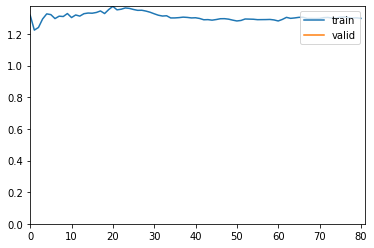

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.234457,0.876477,0.514897,0.510490,0.561538,00:49
1,1.171808,0.839308,0.536287,0.531664,0.555385,00:50
2,1.133724,0.805609,0.548510,0.546311,0.535385,00:49
3,1.139302,0.791874,0.550802,0.545858,0.567692,00:49
4,1.072333,0.777223,0.569901,0.566412,0.570769,00:49
5,1.077516,0.769249,0.583652,0.588235,0.538462,00:50
6,1.044413,0.760497,0.572192,0.573052,0.543077,00:50
7,1.036870,0.760520,0.572192,0.576531,0.521538,00:50
8,1.024864,0.751917,0.582124,0.579598,0.576923,00:50
9,1.045100,0.752067,0.587471,0.587302,0.569231,00:50


Better model found at epoch 0 with valid_loss value: 0.8764769434928894.


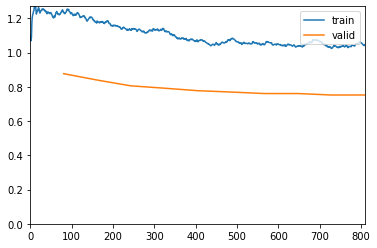

Better model found at epoch 1 with valid_loss value: 0.8393076062202454.
Better model found at epoch 2 with valid_loss value: 0.8056092262268066.
Better model found at epoch 3 with valid_loss value: 0.7918742299079895.
Better model found at epoch 4 with valid_loss value: 0.7772231698036194.
Better model found at epoch 5 with valid_loss value: 0.7692489624023438.
Better model found at epoch 6 with valid_loss value: 0.7604973912239075.
Better model found at epoch 8 with valid_loss value: 0.7519170045852661.


In [11]:
learn.fine_tune(10,base_lr=1e-4)

In [12]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

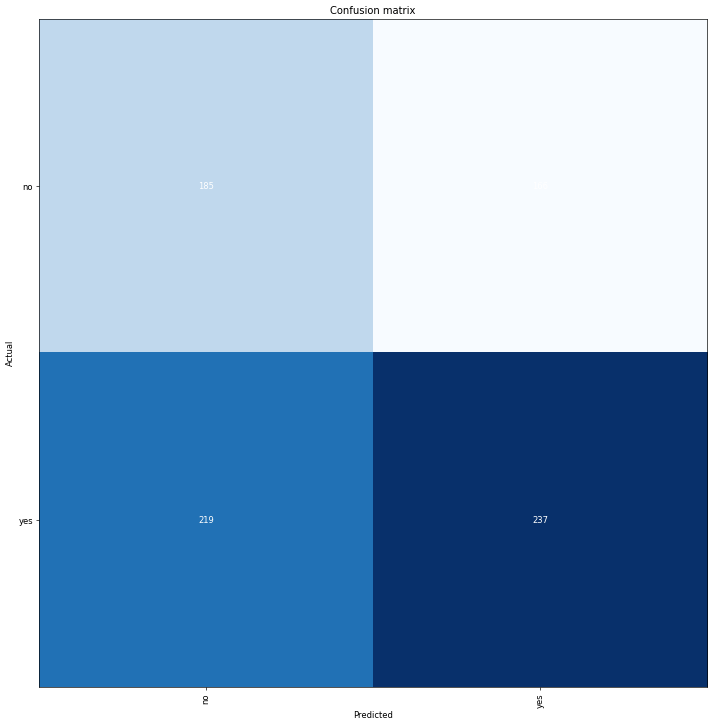

In [13]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [14]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5229244232177734.


(#4) [0.8293028473854065,0.5229244232177734,0.5880893300248139,0.5197368421052632]

In [15]:
learn.export(fname='resnet34.pkl')